In [1]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

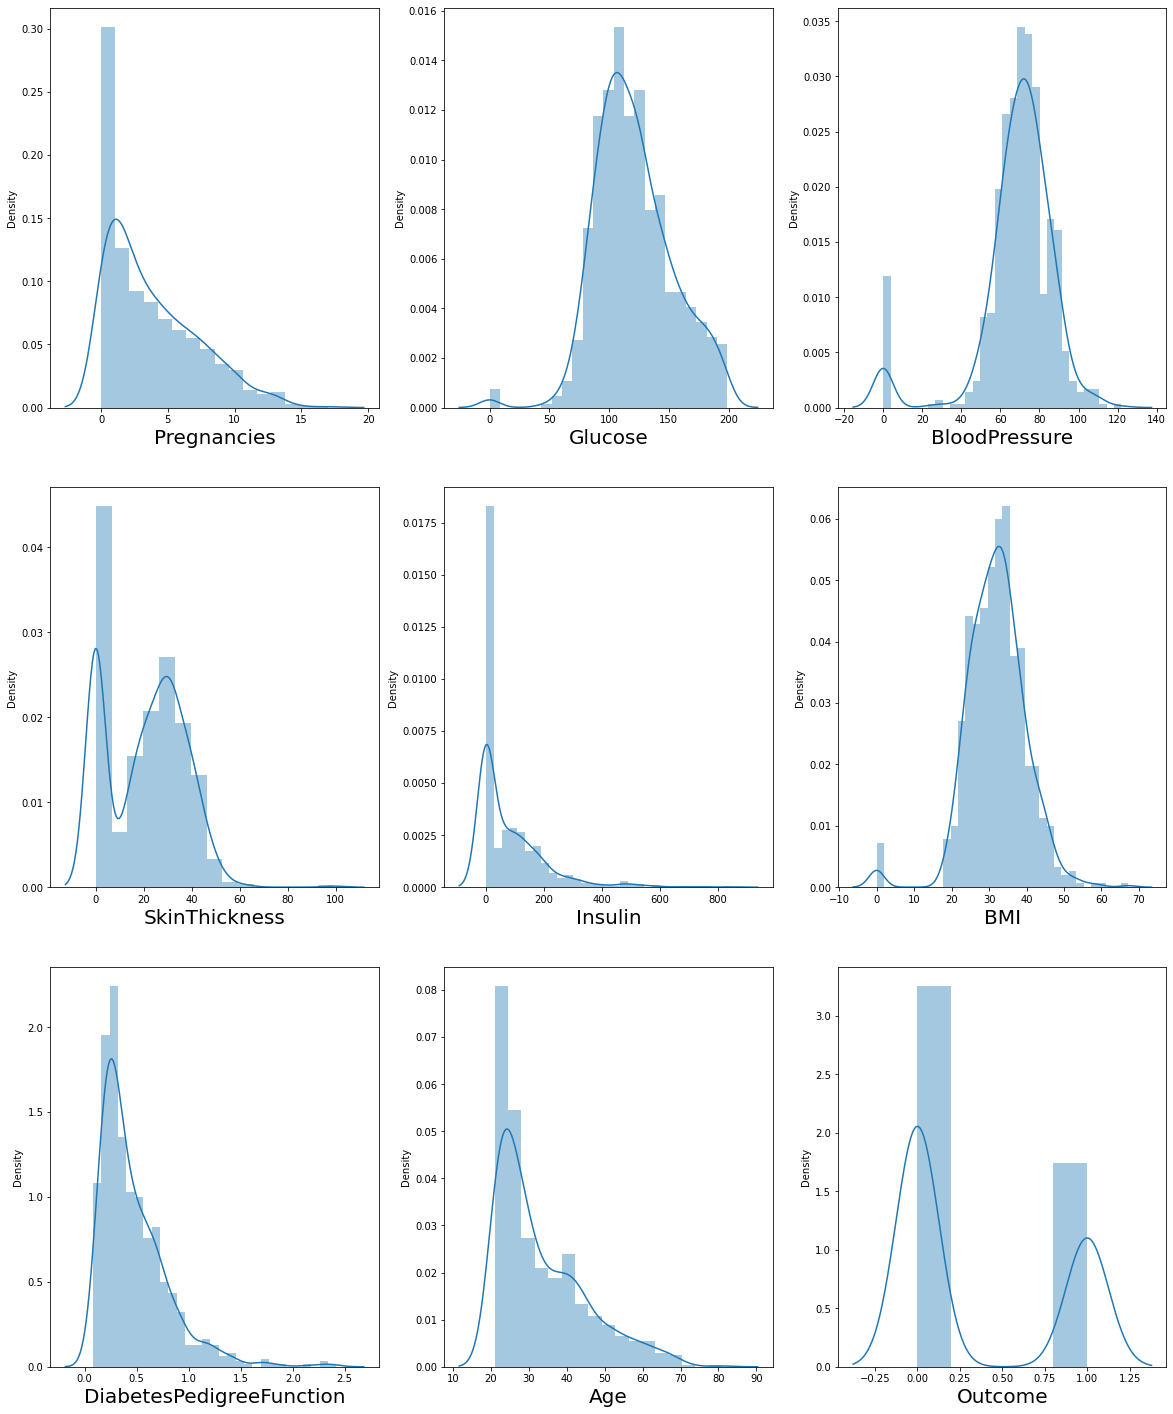

In [5]:
plt.figure(figsize=(20,25), facecolor= 'white')
plotnumber = 1
for column in data:

  if plotnumber <= data.shape[1]:
    ax = plt.subplot(3, 3, plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
    
  plotnumber += 1
plt.show()

In [6]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

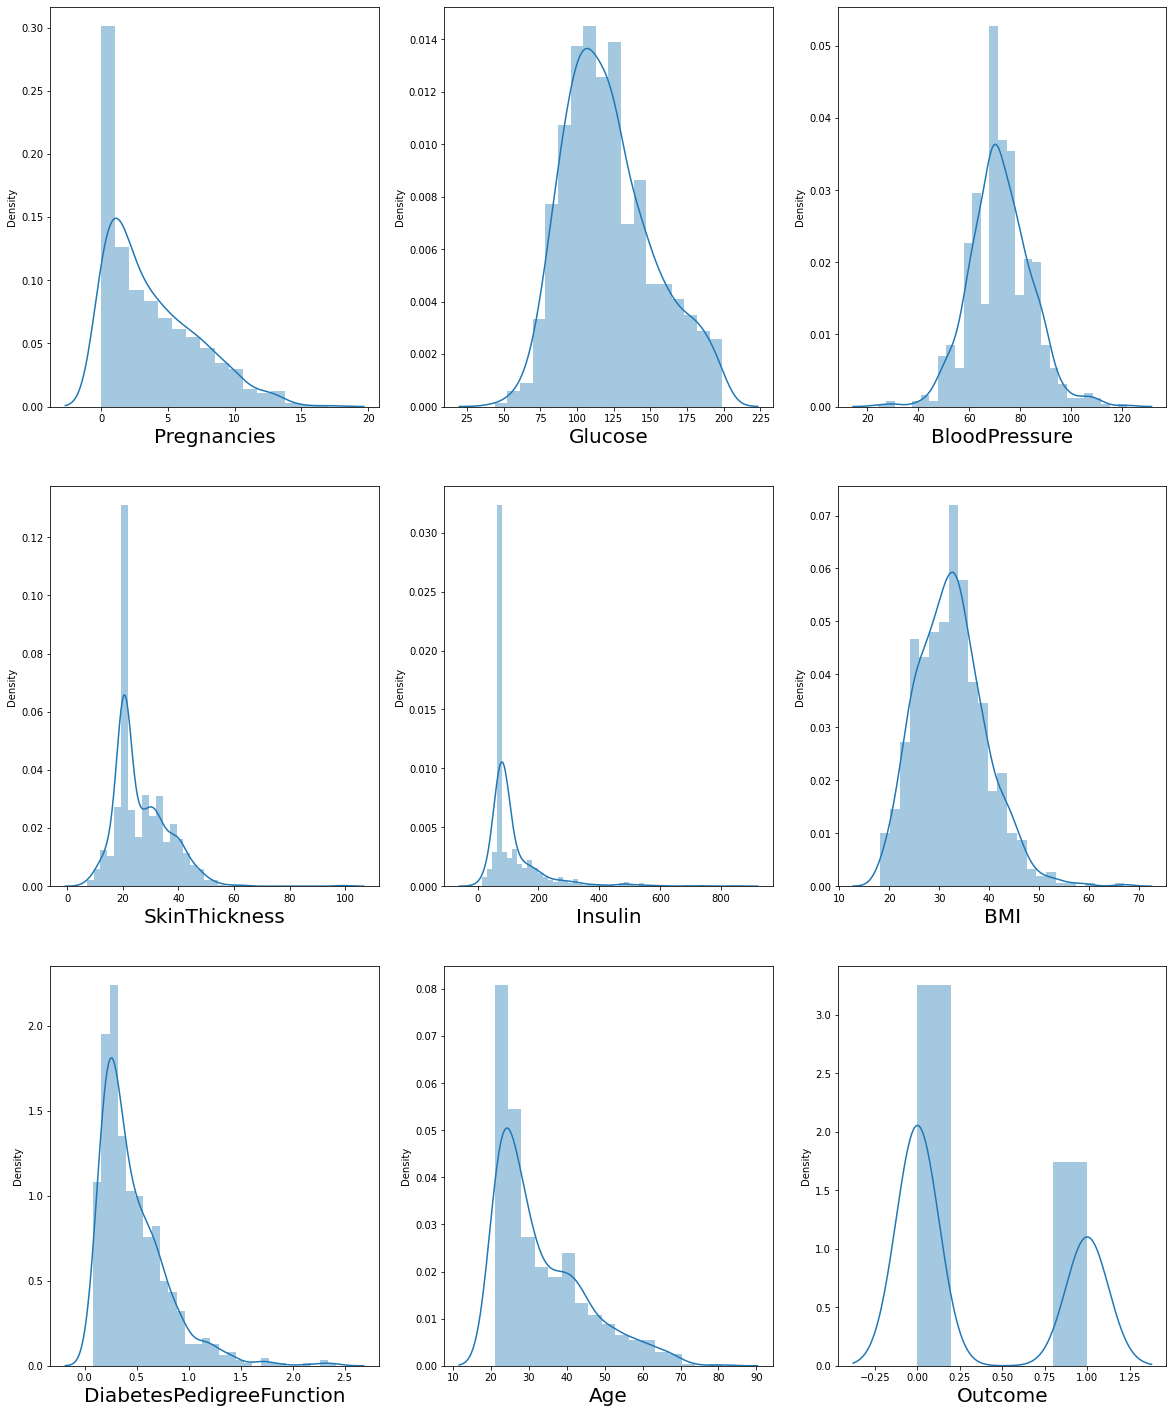

In [7]:
plt.figure(figsize=(20,25), facecolor= 'white')
plotnumber = 1
for column in data:

  if plotnumber <= data.shape[1]:
    ax = plt.subplot(3, 3, plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
    
  plotnumber += 1
plt.show()

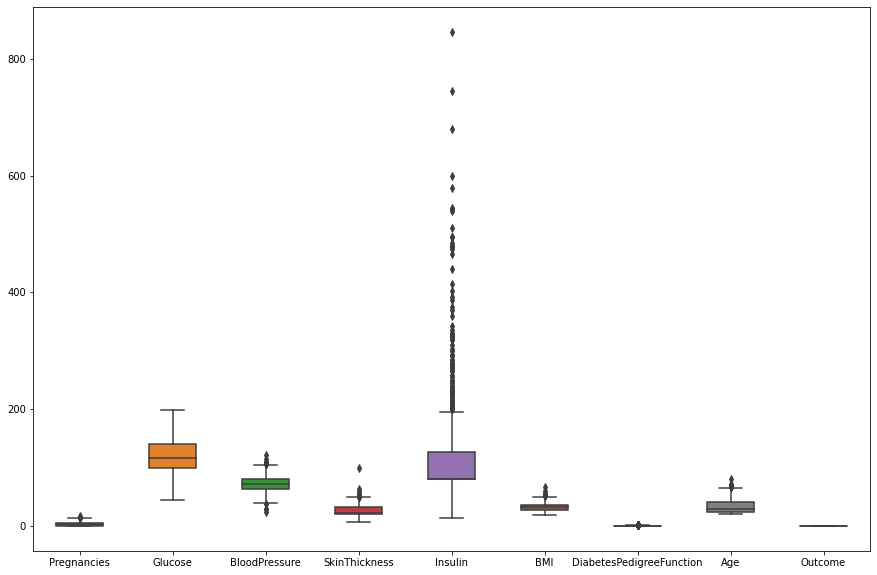

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = data, width = 0.5 , ax = ax, fliersize=5)

In [9]:
q = data['Pregnancies'].quantile(0.93)
data_cleaned = data[data['Pregnancies']< q]
q = data['BloodPressure'].quantile(0.85)
data_cleaned = data[data['BloodPressure']< q]
q = data['SkinThickness'].quantile(0.95)
data_cleaned = data[data['SkinThickness']< q]
q = data['Insulin'].quantile(0.80)
data_cleaned = data[data['Insulin']< q]
q = data['BMI'].quantile(0.95)
data_cleaned = data[data['BMI']< q]
q = data['Age'].quantile(0.97)
data_cleaned = data[data['Age']< q]

print(data_cleaned)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
762            9     89.0           62.0      20.536458   79.799479  22.5   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

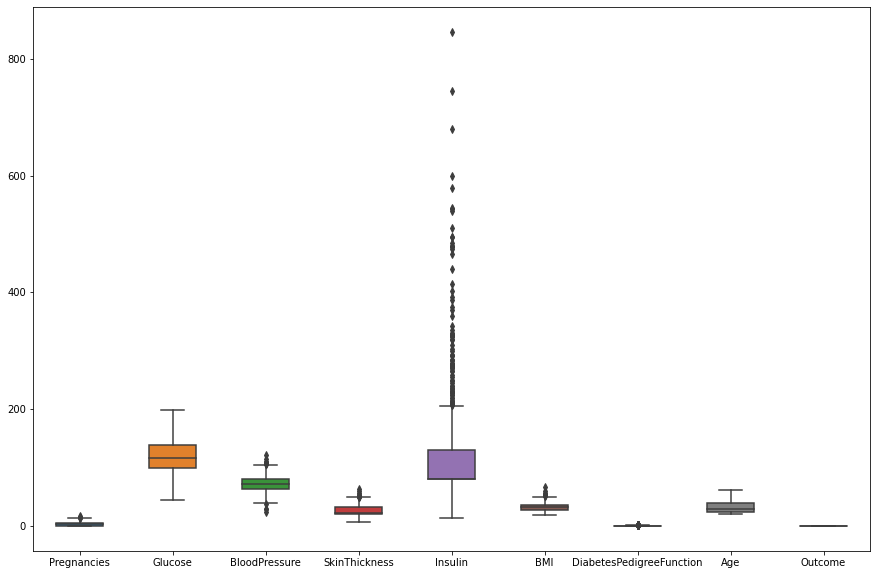

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = data_cleaned, width = 0.5 , ax = ax, fliersize=5)

In [11]:
X = data.drop(columns= ['Outcome'])
y = data['Outcome']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

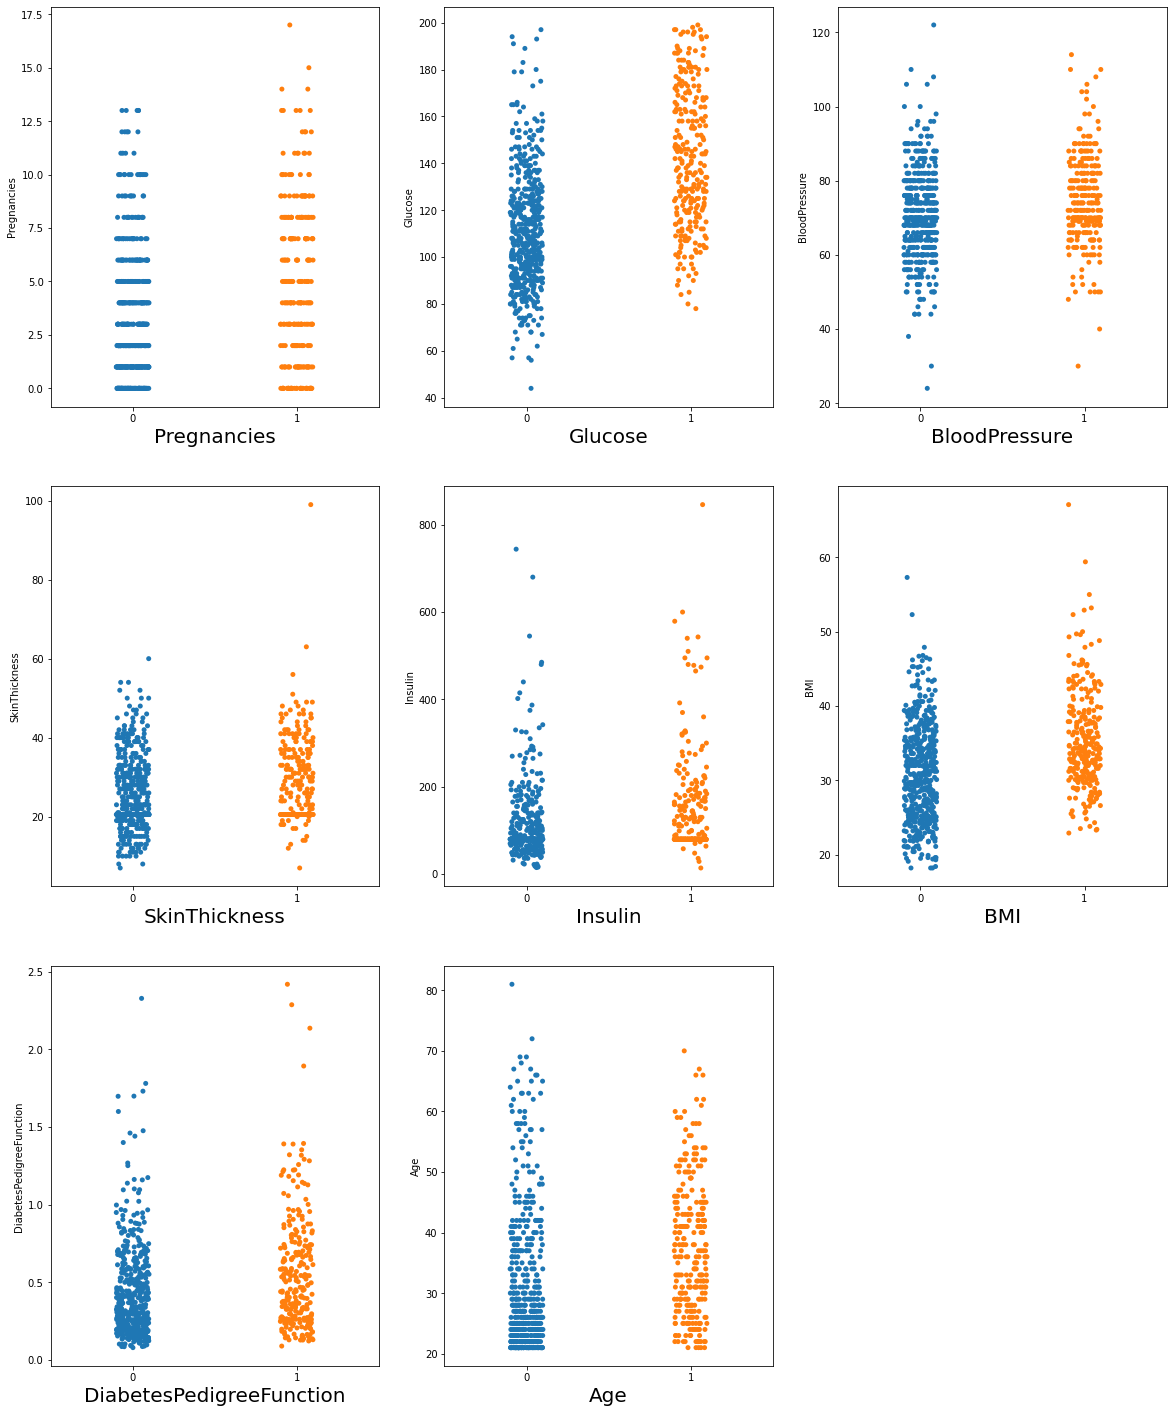

In [12]:
plt.figure(figsize=(20,25), facecolor= 'white')
plotnumber = 1
for column in X:
  if plotnumber<= data.shape[1]:
    ax = plt.subplot( 3, 3, plotnumber)
    sns.stripplot(y, X[column])
    plt.xlabel(column, fontsize = 20)
    
  plotnumber += 1
plt.show()

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [14]:
for i in x_scaled:
  print(i)


[ 0.63994726  0.86527574 -0.0210444   0.87205698 -0.41776815  0.16725546
  0.46849198  1.4259954 ]
[-0.84488505 -1.20598931 -0.51658286  0.2486783  -0.41776815 -0.85153454
 -0.36506078 -0.19067191]
[ 1.23388019  2.01597855 -0.68176235 -0.6306536  -0.41776815 -1.33182125
  0.60439732 -0.10558415]
[-0.84488505 -1.07448042 -0.51658286 -0.37470037 -0.26510678 -0.6332224
 -0.92076261 -1.04154944]
[-1.14185152  0.50362629 -2.66391618  0.87205698  0.5304233   1.54989902
  5.4849091  -0.0204964 ]
[ 0.3429808  -0.1867954   0.14413508 -0.6306536  -0.41776815 -0.99707597
 -0.81807858 -0.27575966]
[-0.25095213 -1.43612988 -1.83801875  0.56036764 -0.32960921 -0.21115225
 -0.676133   -0.61611067]
[ 1.82781311 -0.21967262 -0.260103   -0.6306536  -0.41776815  0.41467589
 -1.02042653 -0.36084741]
[-0.54791859  2.47625968 -0.18622389  1.91102143  4.56182572 -0.28392297
 -0.94794368  1.68125866]
[ 1.23388019  0.10909961  1.96110943 -0.6306536  -0.41776815 -0.06669102
 -0.7244549   1.76634642]
[ 0.0460143

In [15]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y , test_size =0.25, random_state = 0)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [18]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn.predict(x_test)

In [20]:
knn.score(x_train,y_train)

0.7951388888888888

In [21]:
knn.score(x_test,y_test)

0.765625

In [22]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.765625


In [23]:
param_grid = {
    'algorithm':['ball_tree','kd_tree'],'leaf_size':[18,20,25,27,30,32,34],'n_neighbors':[3,5,7,9,10,11,12,13]
}

In [24]:
gridsearch = GridSearchCV(knn,param_grid, verbose=1)

In [25]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=1)

In [26]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [27]:
knn = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 18, n_neighbors= 13)

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=13)

In [29]:
knn.score(x_train,y_train)

0.78125

In [30]:
knn.score(x_test,y_test)

0.8020833333333334

In [31]:
kfold = KFold(n_splits= 12 , shuffle=True)
kfold.get_n_splits(x_scaled)

12

In [32]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=13)
cnt = 0
count = []
train_score = []
test_score = []

for train_index, test_index in kfold.split(x_scaled):
  x_train, x_test = x_scaled[train_index], x_scaled[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  knn.fit(x_train,y_train)
  trainscore = knn.score(x_train,y_train)
  testscore = knn.score(x_test, y_test)
  cnt += 1
  count.append(cnt)
  #print(count)
  train_score.append(trainscore)
  test_score.append(testscore)
  print('For K:',cnt)
  print('train score is:',trainscore, 'and test score is:',testscore)
print('---------------------------------------------------------------')
print('---------------------------------------------------------------')
print('Average train score is:', mean(train_score))
print('Average test score is:', mean(test_score))




For K: 1
train score is: 0.7926136363636364 and test score is: 0.75
For K: 2
train score is: 0.7954545454545454 and test score is: 0.765625
For K: 3
train score is: 0.7855113636363636 and test score is: 0.78125
For K: 4
train score is: 0.8039772727272727 and test score is: 0.71875
For K: 5
train score is: 0.8011363636363636 and test score is: 0.78125
For K: 6
train score is: 0.7855113636363636 and test score is: 0.734375
For K: 7
train score is: 0.8110795454545454 and test score is: 0.6875
For K: 8
train score is: 0.7826704545454546 and test score is: 0.8125
For K: 9
train score is: 0.7869318181818182 and test score is: 0.796875
For K: 10
train score is: 0.7997159090909091 and test score is: 0.734375
For K: 11
train score is: 0.8068181818181818 and test score is: 0.734375
For K: 12
train score is: 0.7911931818181818 and test score is: 0.765625
---------------------------------------------------------------
---------------------------------------------------------------
Average train sc

([<matplotlib.axis.YTick at 0x7f0dee96c9d0>],
 <a list of 1 Text major ticklabel objects>)

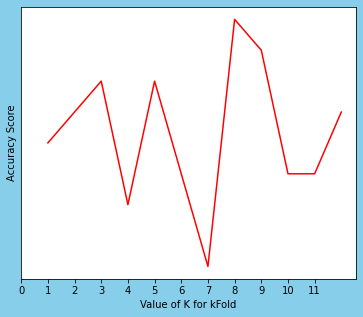

In [33]:
plt.figure(figsize=(6,5), facecolor= 'skyblue')
plt.plot(count, test_score,c='r')
plt.xlabel('Value of K for kFold')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(0, 12, 1))
plt.yticks(np.arange(0.65, 1, 0.85))

In [34]:
import pickle

with open('/prediction.sav','wb') as f:
  pickle.dump(knn,f)

with open('/standardscalar.sav','wb') as f:
  pickle.dump(scaler,f)